##### Compeleted function prepare_data(file_name_dataset) return (X for input and y for output)

In [73]:
# libraries and frameworks
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import random

In [74]:
df = pd.read_csv('Advertising.csv')
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [75]:
df = df.drop(df.columns[0], axis=1)
# Save the updated DataFrame back to a new CSV file
df.to_csv('ad.csv', index=False)

In [76]:
# functions
def get_column(data, index):
    # code here
    result = [] 
    for i in range(len(data)):
        result.append(data[i][index])
    return result

#  prepare data
def prepare_data ( file_name_dataset ):
    data = np.genfromtxt(file_name_dataset,delimiter=',',skip_header=1).tolist()
    N = len( data )
    
    # get tv ( index =0)
    tv_data = get_column( data , 0)
    
    # get radio ( index =1)
    radio_data = get_column(data,1)
    
    # get newspaper ( index =2)
    newspaper_data = get_column(data,2)
    
    # get sales ( index =3)
    sales_data = get_column(data,3) 
    
    # building X input and y output for training
    X = [ tv_data , radio_data , newspaper_data ]
    y = sales_data
    return X , y

In [77]:
# test the function
X, y = prepare_data('ad.csv')
list = [sum(X[0][:5]),sum(X[1][:5]),sum(X[2][:5]),sum(y[:5])]
print ( list )

[624.1, 175.1, 300.5, 73.2]


##### Compeleted function implement_linear_regression(X_data, y_data, epoch_max, lr) then return 4 parameters w1, w2, w3, b and the loss history

In [78]:
# initialize the parameters function
def initialize_parameters():

    # in real world we should initialize the weights and bias randomly as below
    # w1 = random.gauss(mu=0.0,sigma=0.01 )
    # w2 = random.gauss(mu=0.0,sigma=0.01 )
    # w3 = random.gauss(mu=0.0,sigma=0.01 )
    # b=0

    # for this excerise we will initialize the weights and bias as follows
    w1 , w2 , w3 , b = (0.016992259082509283 , 0.0070783670518262355 , -0.002307860847821344 , 0)
    return w1, w2, w3, b

In [79]:
#  predict function
def predict(x1,x2,x3,w1, w2, w3, b):
    # code here
    y = w1*x1 + w2*x2 + w3*x3 + b
    return y

In [80]:
# test the function
y_predict = predict( x1 =1 , x2 =1 , x3 =1 , w1 =0 , w2 =0.5 , w3 =0 , b =0.5)
print ( y_predict )

1.0


In [81]:
# compute the loss function
def compute_loss_mse(y_hat, y):
    loss = (y_hat - y)**2
    return loss

In [82]:
# test the function
l = compute_loss_mse(y_hat = 1 , y = 0.5 )
print ( l )

0.25


In [83]:
# compute the gradient wi and b function
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2*xi*(y_hat - y)
    return dl_dwi
def compute_gradient_b(y, y_hat):
    dl_db = 2*(y_hat-y)
    return dl_db

In [84]:
# MSE loss, test the function
g_wi =compute_gradient_wi(xi=1, y=1, y_hat=0.5)
g_b = compute_gradient_b(y=2, y_hat=0.5)
print ( g_wi , g_b )

-1.0 -3.0


In [85]:
# update_weights function
def update_weight_wi(wi, dl_dwi,lr):
    wi = wi-lr*dl_dwi
    return wi
def update_weight_b(b, dl_db,lr):
    b = b-lr*dl_db
    return b

In [86]:
# test the function
after_wi = update_weight_wi(wi=1, dl_dwi=-0.5,lr = 1e-5)   
after_b = update_weight_b(b=0.5, dl_db=-1,lr=1e-5)
print ( after_wi , after_b )

1.000005 0.50001


In [87]:
# implement_linear_regression function 
def implement_linear_regression(X_data, y_data, epoch_max=50, lr =1e-5):
    losses=[]
    w1,w2,w3,b = initialize_parameters()
    
    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y=y_data[i]

            # compute the prediction
            y_hat = predict(x1,x2,x3,w1,w2,w3,b)

            # compute the loss
            loss = compute_loss_mse(y,y_hat)

            # compute the gradients
            dw1 = compute_gradient_wi(x1,y,y_hat)
            dw2 = compute_gradient_wi(x2,y,y_hat)
            dw3 = compute_gradient_wi(x3,y,y_hat)
            db = compute_gradient_b(y,y_hat)

            # update parameters
            w1=update_weight_wi(w1,dw1,lr)
            w2=update_weight_wi(w2,dw2,lr)
            w3=update_weight_wi(w3,dw3,lr)
            b=update_weight_wi(b,db,lr)

            # log the loss
            losses.append(loss)
    return (w1,w2,w3,b,losses)

[230.1, 44.5, 17.2, 151.5, 180.8]


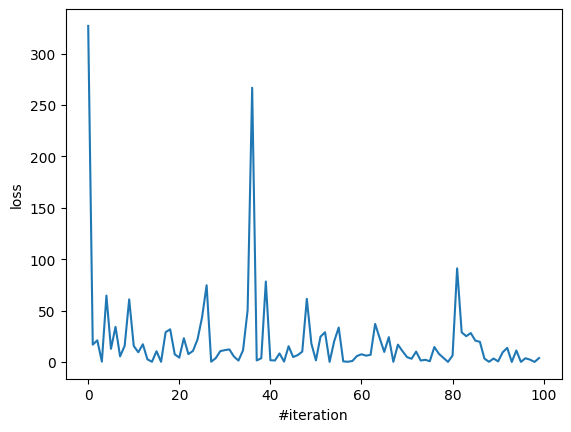

In [88]:
#  training data by call the function and plot for 100 iteration 
X, y = prepare_data('ad.csv')

print(X[0][:5])
(w1,w2,w3,b,losses)= implement_linear_regression(X,y)
plt.plot(losses[:100])
plt.xlabel('#iteration')
plt.ylabel('loss')
plt.show()


In [89]:
X, y = prepare_data('ad.csv')
(w1,w2,w3,b,losses)=implement_linear_regression(X,y)
print(w1,w2,w3)

0.04852890959018609 0.2291416152843605 0.019471276376612508


In [90]:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3
X , y = prepare_data ('ad.csv')
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression(X , y , epoch_max =50 , lr=1e-5)

sales = predict(tv,radio,newspaper,w1,w2,w3,b)
print (f' predicted sales is { sales }')

 predicted sales is 10.245522945932747
